# Figure S4

Regression between DEM-derived lake volumes and those from the physically based depth estimates using Landsat 8 (Moussavi et al., 2020)

In [ ]:
# imports

# for data reading
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# set some universal plot settings here
plt.rcParams["figure.dpi"] = 300
sns.set_style("ticks")
sns.set_context("notebook", font_scale=0.65)
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

In [ ]:
# lake volume data (DEM method)
dem_volume_df = pd.read_csv('landsat8_ameryLake_volumes_elevations.csv', sep =',',index_col='datetime', parse_dates=True)

# drop values not in also in moussavi dataset
dem_volume_df.drop([pd.Timestamp('2013-12-20'),pd.Timestamp('2015-12-26'),pd.Timestamp('2019-02-20')], inplace =True)

In [ ]:
moussavi_df = pd.read_csv('moussavi_landsat8_depth_timeseries.csv', index_col='datetime', parse_dates=True)
moussavi_df.rename(columns={'sum': 'moussavi_volume'},inplace=True)

In [ ]:
merged_df = pd.merge(dem_volume_df, moussavi_df, left_index=True, right_index=True)

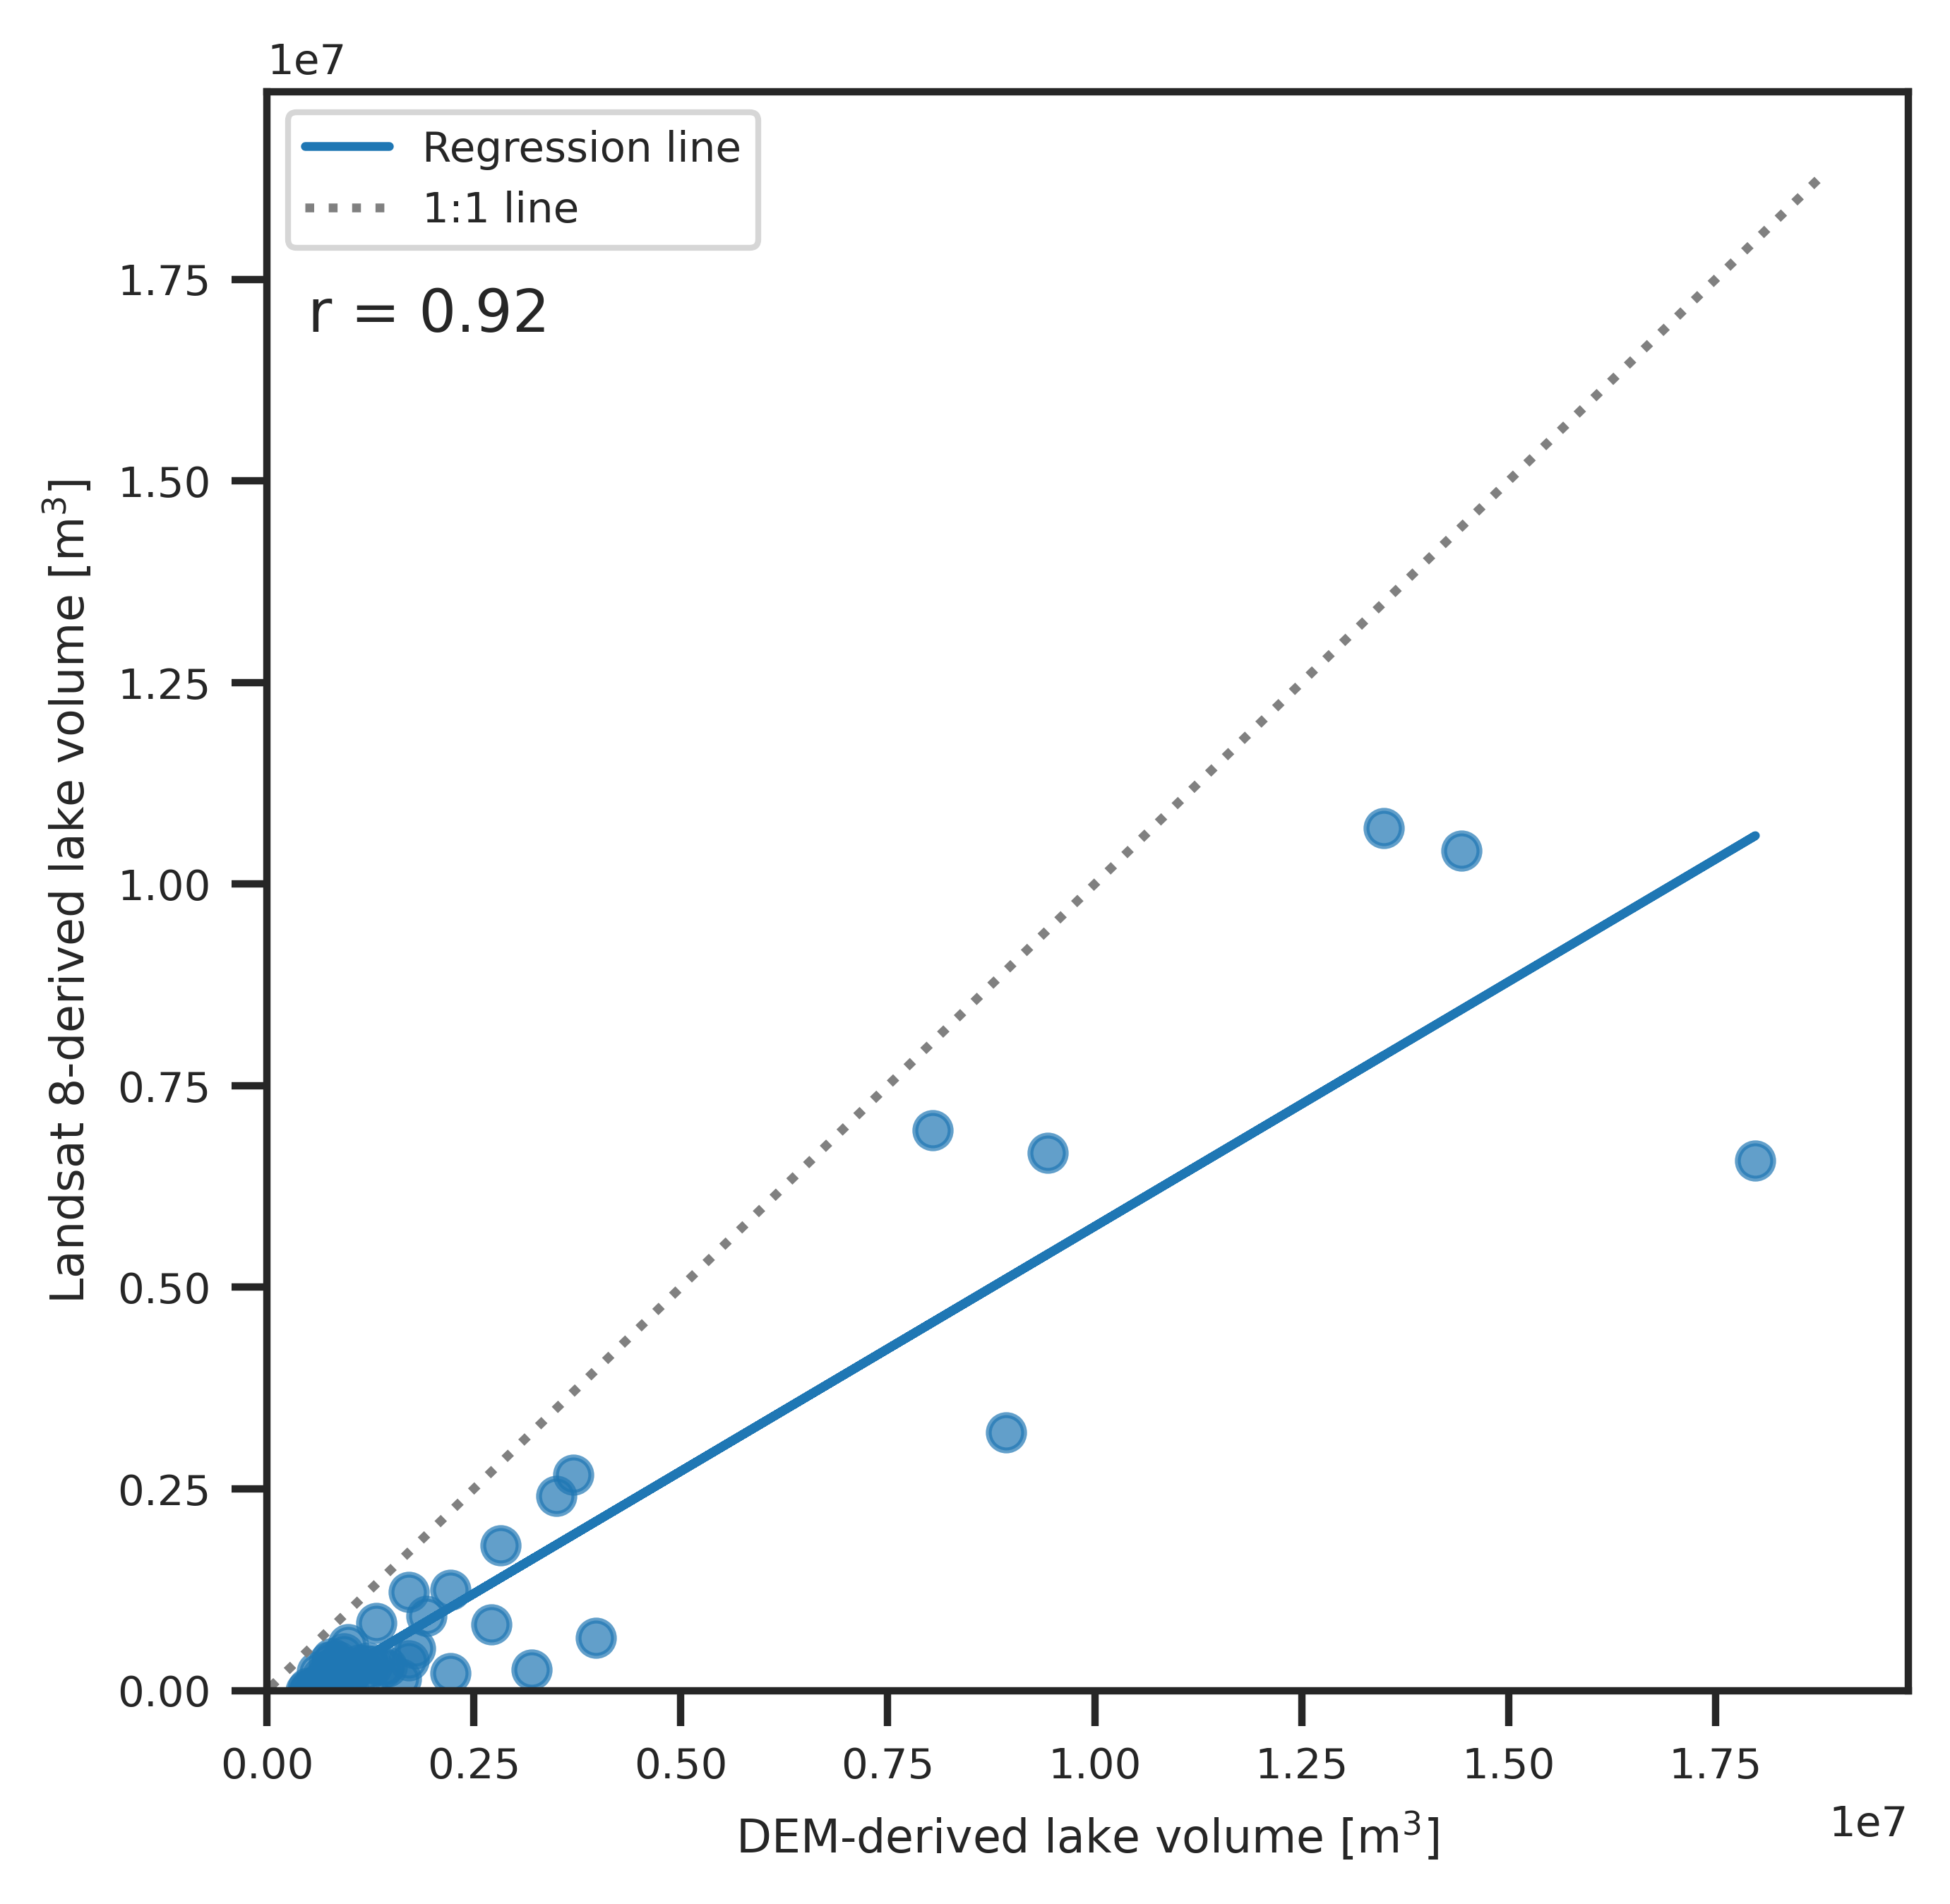

Correlation: 0.9213358732738726
Coefficient of determination: 0.85
Model Coefficients: 0.6071174708000635
Model intercept: -316874.2132952425


In [5]:
# run stats
X = merged_df['volume [m3]'].values[:,np.newaxis]
y = merged_df['moussavi_volume'].values
model = LinearRegression()
model.fit(X, y)

# make figure
fig, ax = plt.subplots(figsize=(5,5))

# plot data
ax.scatter(X, y, marker='o', alpha=0.7)

# plot regression line
ax.plot(X, model.predict(X))

# plot 1:1 line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, linestyle='dotted', color='grey')
ax.set_xlim(0,np.max([ax.get_xlim()]))
ax.set_ylim(0,np.max([ax.get_xlim()]))

# add legend
ax.legend(['Regression line','1:1 line'])

# add labels
ax.set_xlabel("DEM-derived lake volume [m$^3$]")
ax.set_ylabel("Landsat 8-derived lake volume [m$^3$]")

# add correlation to plot
corr = merged_df['volume [m3]'].corr(merged_df['moussavi_volume'])
ax.annotate('r = ' + str(corr)[0:4], xy=(0.025, 0.85), xycoords='axes fraction', size=10)

plt.show()

# print some other stats
print('Correlation:', corr)
print('Coefficient of determination: %.2f'
      % r2_score(y,model.predict(X)))
print('Model Coefficients:', model.coef_[0])
print("Model intercept:", model.intercept_)

# save fig
fig.savefig('FigureS4.png')
